In [1]:
# Import Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Added Hvplot to prior list
import hvplot.pandas

In [2]:
# Collecting and calculating sp500 data, price and daily returns

sp500_data = yf.download('^GSPC',  period="5y") 

sp500_closing_prices = sp500_data['Close']

sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']
sp500_returns = sp500_closing_prices.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Get portfolio information from a user, define period user analisys and fetch closing prices for a portfolio
portfolio = {}

while True:
    stock = input("Enter a stock symbol (or 'done' to finish): ").upper()
    if stock == 'DONE':
        break
    quantity = int(input(f"Enter the quantity of {stock}: "))
    portfolio[stock] = quantity
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())
historical_data = {}


for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']

#Change dataframe to pandas
historical_df = pd.DataFrame(historical_data)

#Calculate portfolio daily returns and drop na
portfolio_returns = historical_df.pct_change().fillna(value=0)

Enter a stock symbol (or 'done' to finish):  gala-usd
Enter the quantity of GALA-USD:  14000
Enter a stock symbol (or 'done' to finish):  xrp-usd
Enter the quantity of XRP-USD:  1650
Enter a stock symbol (or 'done' to finish):  elon-usd
Enter the quantity of ELON-USD:  1100000000
Enter a stock symbol (or 'done' to finish):  cro-usd
Enter the quantity of CRO-USD:  5000
Enter a stock symbol (or 'done' to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/dr/0swzrkds51z2cdk6nsm484dr0000gp/T/ipykernel_6396/4112456937.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  portfolio_returns = historical_df.pct_change().fillna(value=0)


In [5]:
portfolio

{'GALA-USD': 14000, 'XRP-USD': 1650, 'ELON-USD': 1100000000, 'CRO-USD': 5000}

In [6]:
stock_shares

[14000, 1650, 1100000000, 5000]

In [7]:
portfolio_tickers

['GALA-USD', 'XRP-USD', 'ELON-USD', 'CRO-USD']

In [8]:
def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Concatenate tickers into a comma-separated string
        #tickers_str = ' '.join(portfolio_tickers)
        
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None


# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)
current_stock_value = int(current_portfolio_value) * stock_shares

print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")
#current_prices.reset_index()

[*********************100%%**********************]  4 of 4 completed

Current Portfolio Value: $2130.78


In [13]:
### How can we get the value??
valued_each = historical_df * stock_shares
valued_each.hvplot()
#display(valued_each)
#####

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<Axes: title={'center': 'Portfolio Cumulative Returns vs Market (Sp 500)'}, xlabel='Date', ylabel='Return'>

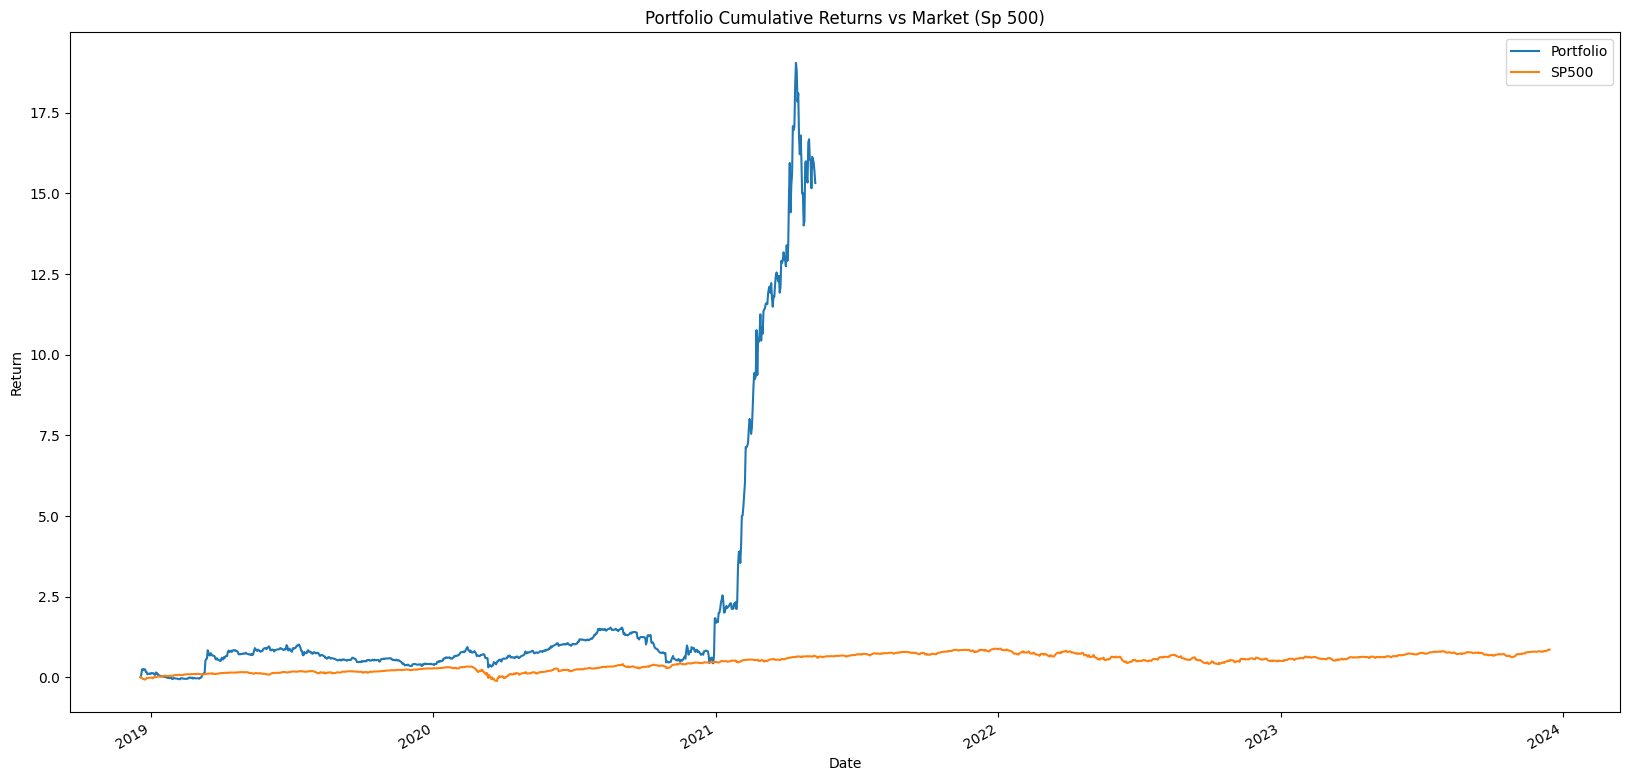

In [14]:
# 

combined_return = portfolio_returns.mean(axis=1)
cumulative_portfolio_returns = (1 + combined_return).cumprod() - 1
ax = cumulative_portfolio_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
cumulative_spy500_returns = (1 + sp500_returns).cumprod() - 1
cumulative_spy500_returns.plot(ax=ax, label='SP500', legend=True)

### Daily returns, excess returns and annual returns

In [17]:
# Calculating the daily returns form historical_df and the daily returns of our portfolio 

# Daily returbns of SP500
#sp500_returns = sp500_closing_prices.pct_change().dropna()

#daily reurns of each stock
#daily_returns = historical_df.pct_change(1).dropna()

# define the risk free rate
risk_free_rate = 0.02/252

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate

# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Displaying the daily returns
display(portfolio_returns)
display(excess_returns)


# Displaying the annual returns
display(annual_daily_returns)
display(annual_excess_returns)

,GALA-USD,XRP-USD,ELON-USD,CRO-USD
Date,,,,
2018-12-18,0.000000,0.000000,0.0,0.000000
2018-12-19,0.000000,0.005123,0.0,0.278598
2018-12-20,0.000000,0.074563,0.0,0.560702
2018-12-21,0.000000,-0.051901,0.0,0.011372
2018-12-22,0.000000,0.010425,0.0,0.058538
...,...,...,...,...
2023-12-13,0.026581,0.014425,0.0,0.016301
2023-12-14,0.017051,0.006279,0.0,-0.004467
2023-12-15,-0.077779,-0.026785,0.0,-0.043104


,GALA-USD,XRP-USD,ELON-USD,CRO-USD
Date,,,,
2018-12-18,-0.000079,-0.000079,-0.000079,-0.000079
2018-12-19,-0.000079,8.453485,-0.000079,1392.988723
2018-12-20,-0.000079,123.029364,-0.000079,2803.511190
2018-12-21,-0.000079,-85.637143,-0.000079,56.862064
2018-12-22,-0.000079,17.200682,-0.000079,292.692217
...,...,...,...,...
2023-12-13,372.137231,23.801190,-0.000079,81.504257
2023-12-14,238.708937,10.359596,-0.000079,-22.336521
2023-12-15,-1088.902891,-44.196130,-0.000079,-215.519019


GALA-USD    1.458731
XRP-USD     0.457214
ELON-USD         inf
CRO-USD     0.731783
dtype: float64

GALA-USD    2.042221e+04
XRP-USD     7.543827e+02
ELON-USD             inf
CRO-USD     3.658895e+03
dtype: float64

### Create a new dataframe with all returns --- portfolio_returns and sp500_returns

In [19]:
### Create a new dataframe with all returns --- portfolio_returns and sp500_returns

all_returns = pd.merge(portfolio_returns, sp500_returns, on='Date')

#all_returns = pd.merge([portfolio_returns, sp500_returns])
all_returns

,GALA-USD,XRP-USD,ELON-USD,CRO-USD,SP500
Date,,,,,
2018-12-18,0.000000,0.000000,0.0,0.000000,0.000086
2018-12-19,0.000000,0.005123,0.0,0.278598,-0.015396
2018-12-20,0.000000,0.074563,0.0,0.560702,-0.015772
2018-12-21,0.000000,-0.051901,0.0,0.011372,-0.020588
2018-12-24,0.000000,0.095696,0.0,-0.026150,-0.027112
...,...,...,...,...,...
2023-12-11,-0.106761,-0.062528,0.0,-0.068546,0.003924
2023-12-12,0.002348,-0.001067,0.0,0.024213,0.004599
2023-12-13,0.026581,0.014425,0.0,0.016301,0.013651


# Calculating the daily returns form historical_df and the daily returns of our portfolio 

# Daily returbns of SP500
sp500_returns = sp500_closing_prices.pct_change().dropna()

#daily reurns of each stock
daily_returns = historical_df.pct_change(1).dropna()
# define the risk free rate
risk_free_rate = 0.02/252

# calculate the excess returns of each stock in the portfolio
excess_returns = daily_returns * stock_shares - risk_free_rate

# Calculate the annual returns
annual_daily_returns = daily_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Displaying the daily returns
display(daily_returns)
display(excess_returns)
display(sp500_returns)

# Displaying the annual returns
display(annual_daily_returns)
display(annual_excess_returns)

### Standard Deviation -- Daily and annual

In [20]:
# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()

# Displaying the daily std
display(portfolio_returns_std)
display(excess_returns_std)

######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Displaying the annualized STD
display(stock_annualized_std)
display(portfolio_annualized_std)

//anaconda3/envs/testmojave/lib/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


GALA-USD    0.111445
XRP-USD     0.056450
ELON-USD         NaN
CRO-USD     0.066988
dtype: float64

GALA-USD    1560.236681
XRP-USD       93.143154
ELON-USD            NaN
CRO-USD      334.940186
dtype: float64

GALA-USD    1.769142
XRP-USD     0.896122
ELON-USD         NaN
CRO-USD     1.063402
dtype: float64

GALA-USD    24767.989465
XRP-USD      1478.601735
ELON-USD             NaN
CRO-USD      5317.010612
dtype: float64

### Calculate and show the annual risk

In [21]:
# Imported new library -- math
import math

# Calculate the stock risk
annual_stock_risk = portfolio_returns.std() * math.sqrt(252)

annual_excess_risk = excess_returns.std() * math.sqrt(252)


display(annual_stock_risk)

display(annual_excess_risk)

GALA-USD    1.769142
XRP-USD     0.896122
ELON-USD         NaN
CRO-USD     1.063402
dtype: float64

GALA-USD    24767.989465
XRP-USD      1478.601735
ELON-USD             NaN
CRO-USD      5317.010612
dtype: float64

GALA-USD    1.458731
XRP-USD     0.457214
ELON-USD         inf
CRO-USD     0.731783
dtype: float64

GALA-USD    2.042221e+04
XRP-USD     7.543827e+02
ELON-USD             inf
CRO-USD     3.658895e+03
dtype: float64

Text(0.5, 1.0, 'Annualized Returns of Assets')

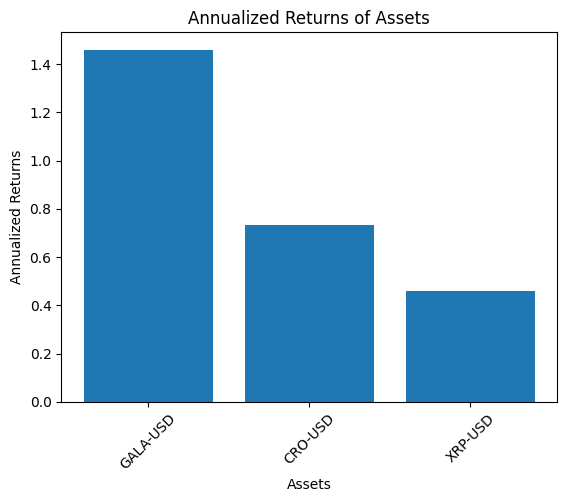

In [22]:
# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)

display(annual_daily_returns)
display(annual_excess_returns)

# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')
plt.xticks(rotation=45)
plt.title('Annualized Returns of Assets')

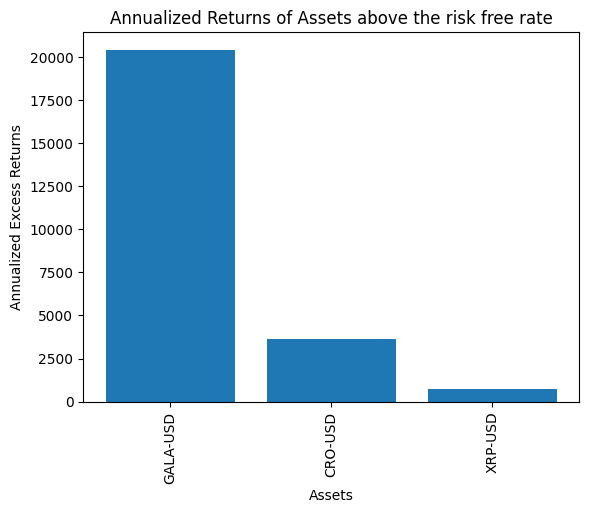

In [23]:
# Plot of the excess annual returns
# plot the sorted annualized returns of stock
plt.bar(sorted_annual_excess_returns.index, sorted_annual_excess_returns)
plt.ylabel("Annualized Excess Returns")
plt.xlabel('Assets')
plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets above the risk free rate')
plt.show()

In [24]:
# creat a dataframe to store the annual returns, annual risks, annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)



,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
GALA-USD,1.458731,1.769142,2.042221e+04,GALA-USD,0.824541
CRO-USD,0.731783,1.063402,3.658895e+03,CRO-USD,0.688153
XRP-USD,0.457214,0.896122,7.543827e+02,XRP-USD,0.510214
ELON-USD,inf,NaN,inf,ELON-USD,NaN


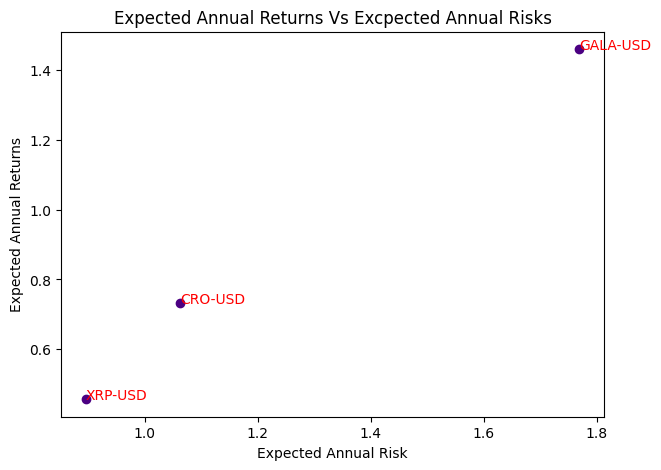

In [25]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')


In [26]:
# redo the calculations for new df
assets = risk_df.index
num_assets = len(assets)

# Display assets
num_assets


4

### Calculate and plot rolling std for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of excess returns for stocks over 21 day period'}, xlabel='Date'>

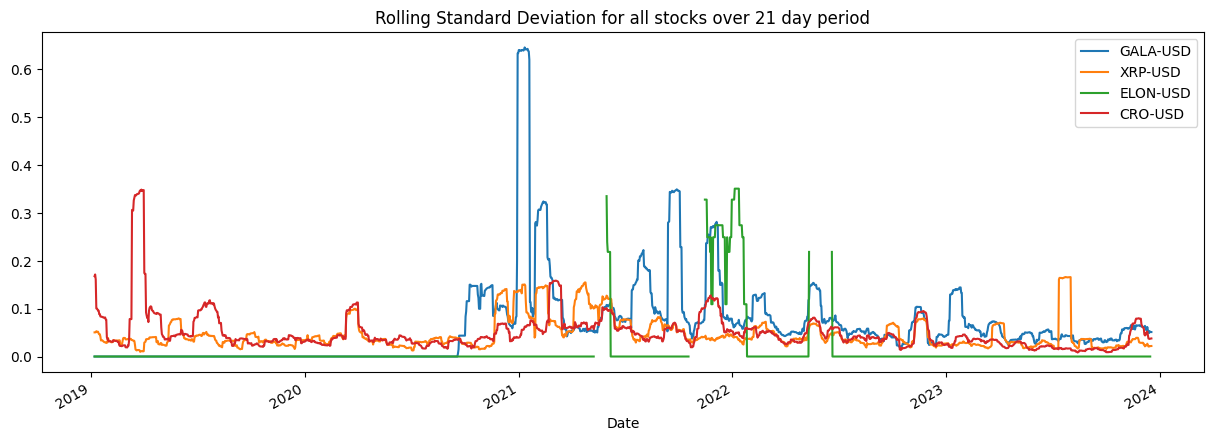

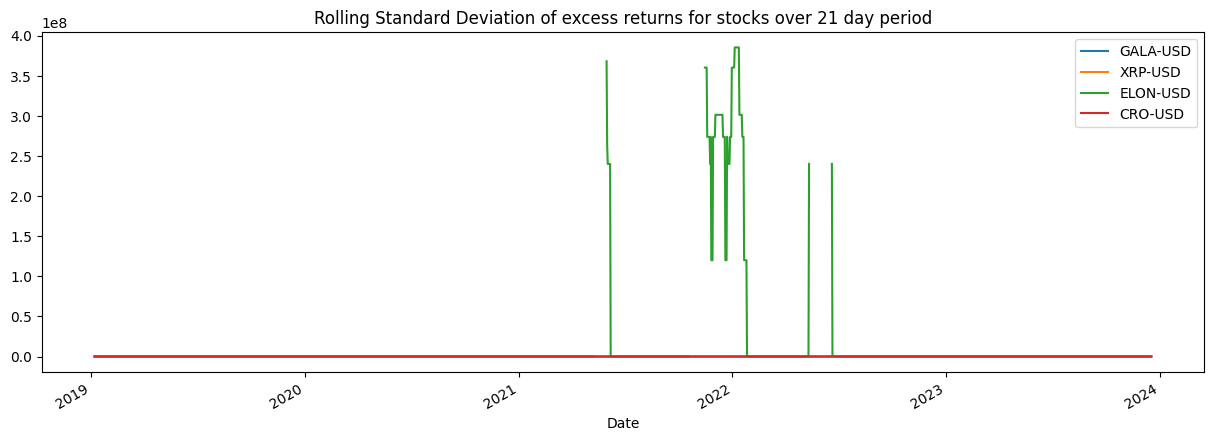

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')


### Sharpe Ratio

In [28]:
# calculte the sharpe ratio -- sharpe ratio lower than 1 is bad, 1 is ok, 3 is the best
sharpe_ratio = np.sqrt(252) * portfolio_returns.mean() / portfolio_returns.std()

# calculating the sharpe ratio of our excess returns
sharpe_ratio_portfolio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

#displaying the sharpe ratios
display(sharpe_ratio)
display(sharpe_ratio_portfolio)

# plot the stocks sharpe ratio
sharpe_ratio.hvplot.bar()

//anaconda3/envs/testmojave/lib/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


GALA-USD    0.824541
XRP-USD     0.510214
ELON-USD         NaN
CRO-USD     0.688153
dtype: float64

GALA-USD    0.824541
XRP-USD     0.510200
ELON-USD         NaN
CRO-USD     0.688149
dtype: float64

:Bars   [index]   (0)

### Calculate and plot the correlation

Should i be adding the sp500 here?

In [ ]:
# Calculate the correlation
correlation_matrix = portfolio_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
correlation_matrix.plot(figsize=(15,3), title='Correlation for Newly Combined Protfolios')

In [ ]:
# Calculate the correlation
correlation = portfolio_returns.corr()
# Plot the correlation
correlation.plot(figsize=(15,5), title = 'Correlation of Stocks in Portfolio')